In [1]:
import pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import h5py
import shutil
import pdb
import datetime
import os
from operator import truediv
import operator
from scipy.optimize import curve_fit
import matplotlib.cm as cm
from scipy.optimize import leastsq

%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2



Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
file = open("temp_data_all.out","r")
date_temp = np.loadtxt('temp_data_all.out')
file.close()

date_weather_data_new = date_temp[0]
temp_weather_data_new = date_temp[1]

temp_frame = [718,120,718,236,718,718,718,526,50,718,106,718]

a= date_weather_data_new[0:718]
b= temp_weather_data_new[0:718]
temp_1 = np.append(a[::2],a[717])
time_1 = np.append(b[::2],b[717])

a= date_weather_data_new[718:838]
b= temp_weather_data_new[718:838]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[119])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[119])

a= date_weather_data_new[838:1556]
b= temp_weather_data_new[838:1556]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[1556:1792]
b= temp_weather_data_new[1556:1792]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[235])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[235])

a= date_weather_data_new[1792:2510]
b= temp_weather_data_new[1792:2510]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[2510:3228]
b= temp_weather_data_new[2510:3228]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[3228:3946]
b= temp_weather_data_new[3228:3946]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[3946:4472]
b= temp_weather_data_new[3946:4472]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[525])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[525])

time_partial_new = np.array([(datetime.datetime.fromtimestamp(x))  for x in temp_1 ])
#time_partial_new = np.array([(datetime.datetime.fromtimestamp(x)) for x in temp_1 ])

# these are the times that we are using from here!
temp_intercept_model = time_1[41::]
time_intercept_model = time_partial_new[41::]

In [5]:
date_weather_data_new = date_temp[0]
temp_weather_data_new = date_temp[1]

temp_frame = [718,120,718,236,718,718,718,526,50,718,106,718]

a= date_weather_data_new[0:718]
b= temp_weather_data_new[0:718]
temp_1 = np.append(a[::2],a[717])
time_1 = np.append(b[::2],b[717])

a= date_weather_data_new[718:838]
b= temp_weather_data_new[718:838]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[119])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[119])

a= date_weather_data_new[838:1556]
b= temp_weather_data_new[838:1556]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[717])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[717])

a= date_weather_data_new[1556:1792]
b= temp_weather_data_new[1556:1792]
temp_1 = np.append(temp_1,a[::2])
temp_1 = np.append(temp_1,a[235])
time_1 = np.append(time_1,b[::2])
time_1 = np.append(time_1,b[235])

time_partial_new = np.array([(datetime.datetime.fromtimestamp(x))  for x in temp_1 ])
temp_intercept_model = time_1[41::]
time_intercept_model = time_partial_new[41::]

In [13]:
a= date_weather_data_new[0:800]
time_partial_new = np.array([(datetime.datetime.fromtimestamp(x))  for x in a ])
b= temp_weather_data_new[0:800]

In [22]:
import numpy as np
import scipy as sp
import scipy.interpolate
print(len(a))
print(len(b))

new_length = 4000
new_x = np.linspace(a.min(), a.max(), new_length)
print(len(new_x))
new_y = sp.interpolate.interp1d(a, b, kind='cubic')(new_x)
print(len(new_y))

800
800
4000
4000


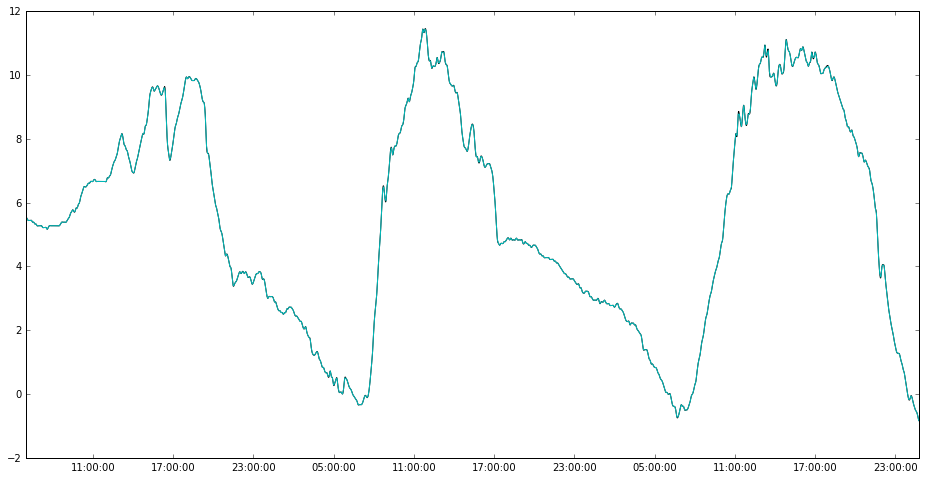

In [26]:
plt.figure(figsize(16,8))
plt.plot(np.array([(datetime.datetime.fromtimestamp(x))  for x in new_x ]),new_y, 'k')
plt.plot(np.array([(datetime.datetime.fromtimestamp(x))  for x in a ]),b,'c')

In [53]:
a= date_weather_data_new[0:718]
b= temp_weather_data_new[0:718]

new_length = 718*5
new_x = np.linspace(a.min(), a.max(), new_length)
print(len(new_x))
new_y = sp.interpolate.interp1d(a, b, kind='cubic')(new_x)
print(len(new_y))

time_new = np.array([(datetime.datetime.fromtimestamp(x))  for x in new_x ])
temp_new = new_y

time_min=[]
temp_min=[]
min_range = [7,17,27,37,47,57]

for i in range(len(time_new)):
    if time_new[i].minute in min_range:
        #print(time_new[i])
        time_min.append(time_new[i])
        temp_min.append(temp_new[i])



3590
3590


In [55]:
print(len(time_min))

358


In [52]:
print(date_weather_data_new[717])
print(date_weather_data_new[718])
print(date_weather_data_new[719])

1491785100.0
1491786000.0
1491786300.0
